# 8. Training with Weighted Loss
Classifier training was repeated with weighted cross-entropy loss.

In [1]:
import sys
import os
import h5py
from collections import Counter
from progressbar import *
import re
import numpy as np
from repeating_classifier_training_utils import *

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

if par_dir not in sys.path:
    sys.path.append(par_dir)
    
from utils import plot_utils    

%load_ext autoreload
%matplotlib inline
%autoreload 2

In [16]:
dump_dir = '/home/cmacdonald/CNN/dumps/'
path_1 = os.path.join(dump_dir,'20200527_141119_weighted_loss_1')
npz_path = os.path.join(os.getcwd(),'Index_Storage')

LABEL_DICT = {0:"gamma", 1:"e", 2:"mu"}
legend_label_dict={'e':'e-','gamma':'\u03B3', 'mu':'\u03BC-'}
softmax_index_dict = {value:key for key, value in LABEL_DICT.items()}
run_names=['Weights=(1,1,3)']

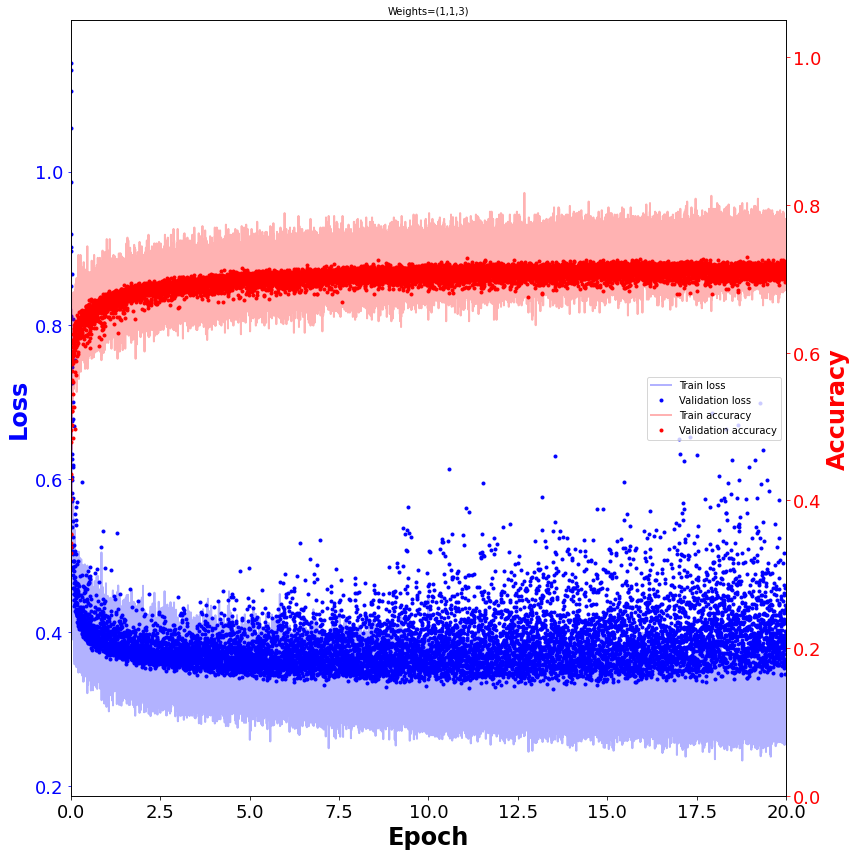

In [3]:
fig = disp_multiple_learn_hist([path_1],titles=["Weights=(1,1,3)"])

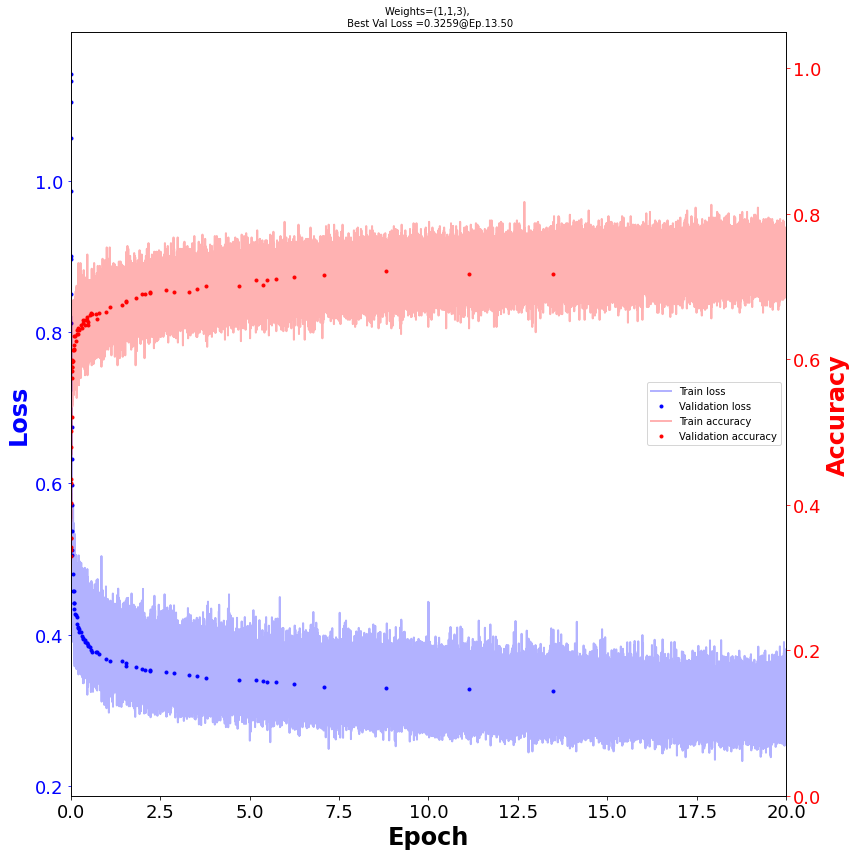

In [4]:
fig = disp_multiple_learn_hist([path_1], titles=["Weights=(1,1,3)"],best_only=True)

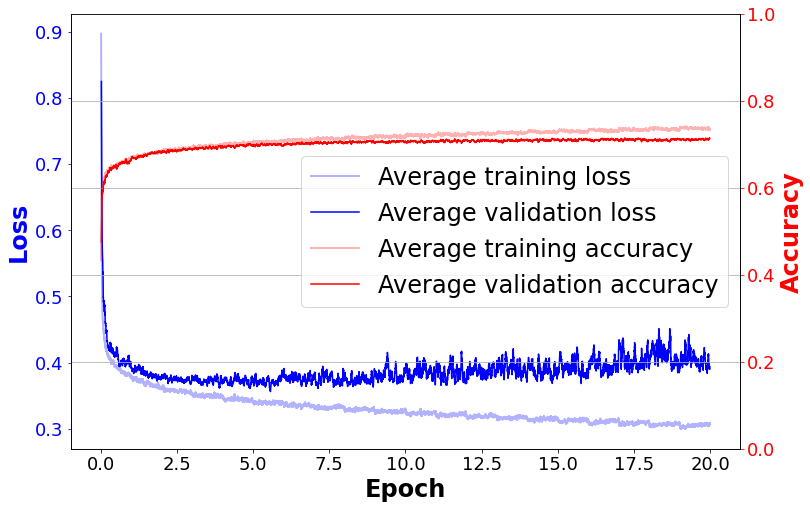

In [5]:
disp_learn_hist_smoothed(path_1,window_train=200,window_val=20)

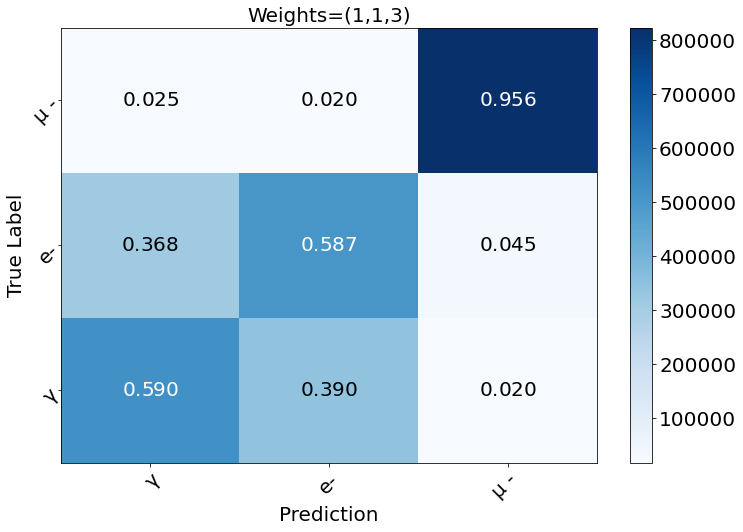

In [6]:
output = load_test_output(os.path.join(path_1,'test_validation_iteration_dump.npz'),npz_path)
plot_confusion_matrix(output['filtered_labels'],output['filtered_predictions'],
                      ['\u03B3','e-','\u03BC -'],title="Weights=(1,1,3)")

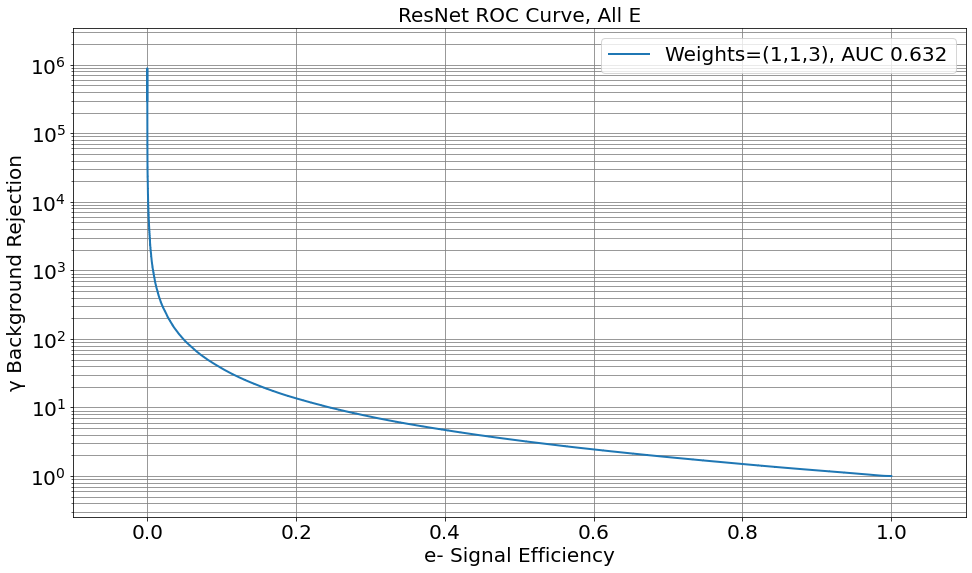

In [18]:
fprs, tprs, thresholds = prep_roc_data(output['filtered_softmaxes'],output['filtered_labels'],
                                'rejection',softmax_index_dict,"e","gamma")
roc_metrics = plot_multiple_ROC(([fprs], [tprs], [thresholds]),'rejection', ["e", "gamma"], 
                                plot_labels=run_names,
                                png_name = 'overlaid_roc',title='ResNet ROC Curve, All E',annotate=False,legend_label_dict=legend_label_dict)

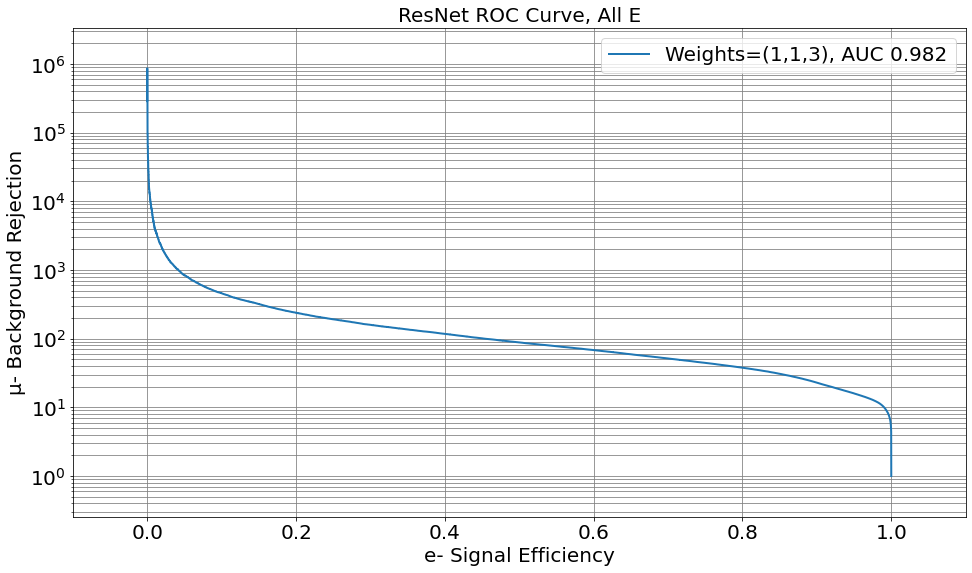

In [19]:
fprs, tprs, thresholds = prep_roc_data(output['filtered_softmaxes'],output['filtered_labels'],
                                'rejection',softmax_index_dict,"e","mu")
roc_metrics = plot_multiple_ROC(([fprs], [tprs], [thresholds]),'rejection', ["e", "mu"], 
                                plot_labels=run_names,
                                png_name = 'overlaid_roc',title='ResNet ROC Curve, All E',annotate=False,legend_label_dict=legend_label_dict)